In [1]:
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

In [2]:
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import sys
from anndata import AnnData
sys.path.insert(1, 'KSRV/')
from main import KSRV
from sklearn.metrics.cluster import contingency_matrix
from scipy.optimize import minimize

In [4]:
RNA = sc.read('KSRV Datasets/Chicken_heart/RNA_D14_adata.h5ad')
Visium = sc.read('KSRV Datasets/Chicken_heart/Visium_D14_adata.h5ad')

In [ ]:
Visium_imputed = KSRV(Visium,RNA,50,method = 'kernelpca')

In [6]:
scv.pp.normalize_per_cell(Visium_imputed, enforce=True) 

Normalized count data: X, spliced, unspliced.


In [7]:
Visium_imputed.X = Visium.to_df()[Visium_imputed.var_names] 

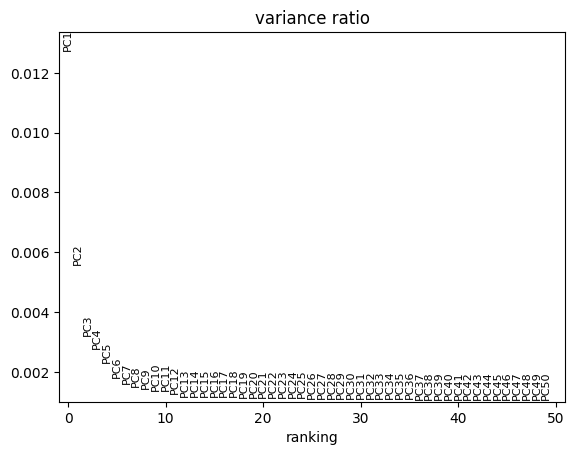

In [8]:
 Visium = Visium[:,Visium_imputed.var_names]
sc.pp.scale(Visium)
sc.tl.pca(Visium)
sc.pl.pca_variance_ratio(Visium, n_pcs=50, log=False)
sc.pp.neighbors(Visium, n_neighbors=30, n_pcs=20)
sc.tl.umap(Visium)

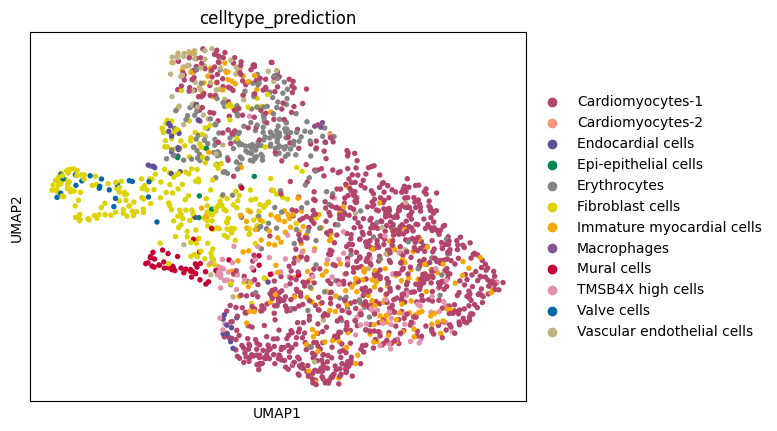

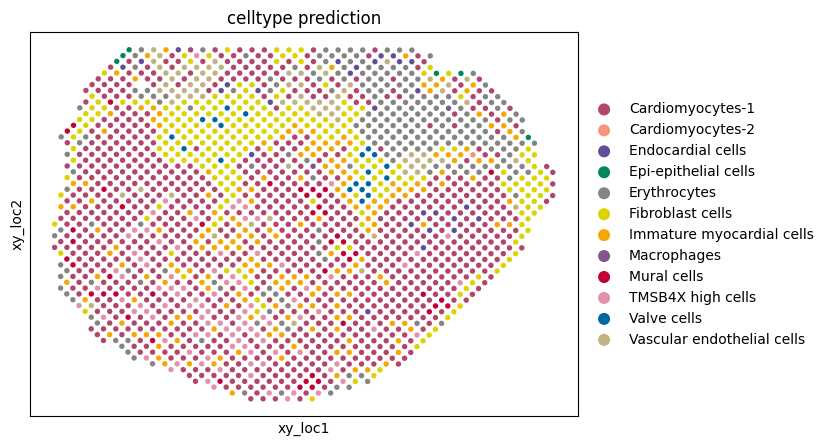

In [9]:
sc.pl.umap(Visium, color='celltype_prediction')
sc.pl.scatter(Visium, basis='xy_loc',color='celltype_prediction')

In [10]:
# Calculating RNA velocities and projecting them on the UMAP embedding and spatial   
# coordinates of the tissue
scv.pp.moments(Visium, n_pcs=20, n_neighbors=30)
scv.tl.velocity(Visium)
scv.tl.velocity_graph(Visium)

computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


c:\ProgramData\anaconda3\Lib\site-packages\scvelo\tools\optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))
c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/1967 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


####  RNA velocity of Visium

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is depre

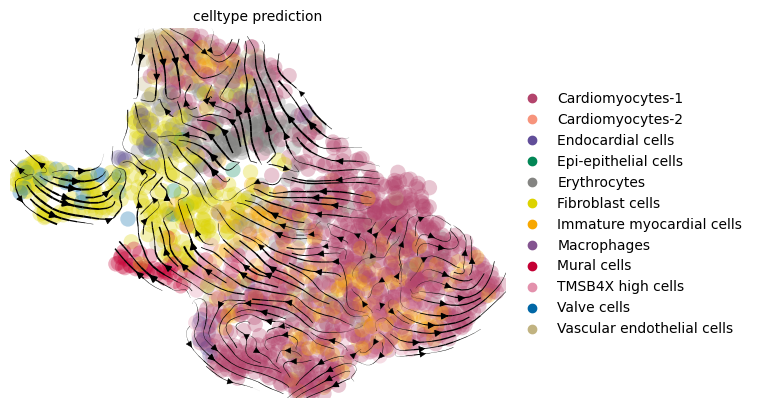

In [11]:
scv.pl.velocity_embedding_stream(Visium, basis='umap', color='celltype_prediction',legend_loc='right')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_xy_loc', embedded velocity vectors (adata.obsm)


c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is depre

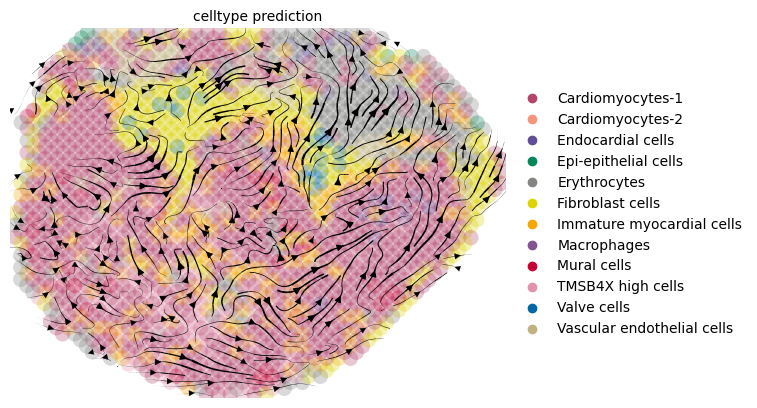

In [12]:
scv.pl.velocity_embedding_stream(Visium, basis='xy_loc', color='celltype_prediction',legend_loc='right')

c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is depre

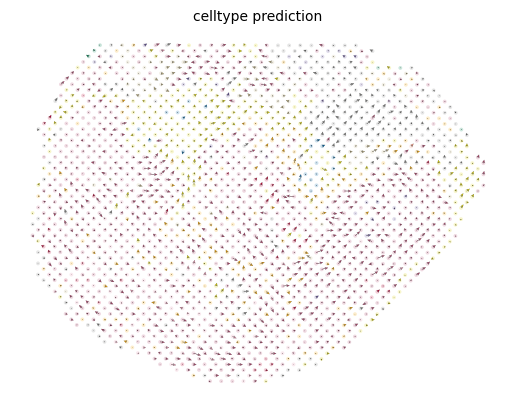

In [13]:
scv.pl.velocity_embedding(Visium,basis='xy_loc', color='celltype_prediction')

In [14]:
# Similar umap and cell type colors to the original Visium data  
Visium_imputed.obsm['X_umap'] = Visium.obsm['X_umap']
Visium_imputed.uns['celltype_prediction_colors'] = Visium.uns['celltype_prediction_colors']

In [15]:
# scv.pp.filter_and_normalize(Visium_imputed, min_shared_counts=20, n_top_genes=2000, enforce=True)
sc.pp.log1p(Visium_imputed)

In [17]:
sc.pp.neighbors(Visium_imputed, n_pcs=20, n_neighbors=30)
scv.pp.moments(Visium_imputed, n_pcs=20, n_neighbors=30)

computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [18]:
# Calculating RNA velocities and projecting them on the UMAP embedding and spatial   #计算RNA速度，并将其投射到组织的UMAP嵌入和空间坐标上。
# coordinates of the tissue
scv.pp.moments(Visium_imputed, n_pcs=20, n_neighbors=30)
scv.tl.velocity(Visium_imputed)
scv.tl.velocity_graph(Visium_imputed)

computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities


c:\ProgramData\anaconda3\Lib\site-packages\scvelo\tools\optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/1967 [00:00<?, ?cells/s]

    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


#### KSRV estimated RNA velocity

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is depre

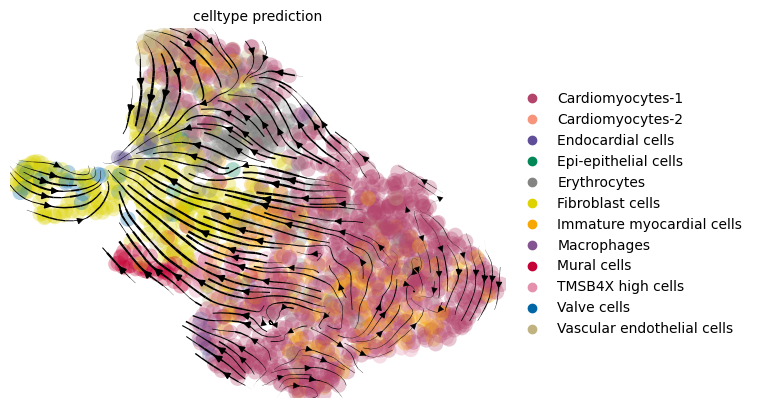

In [19]:
scv.pl.velocity_embedding_stream(Visium_imputed, basis='umap', color='celltype_prediction',legend_loc='right')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_xy_loc', embedded velocity vectors (adata.obsm)


c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is depre

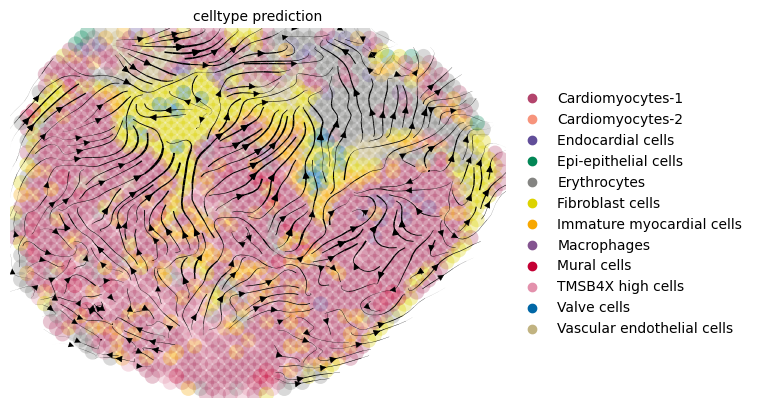

In [20]:
scv.pl.velocity_embedding_stream(Visium_imputed, basis='xy_loc', color='celltype_prediction',legend_loc='right')

c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\ProgramData\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is depre

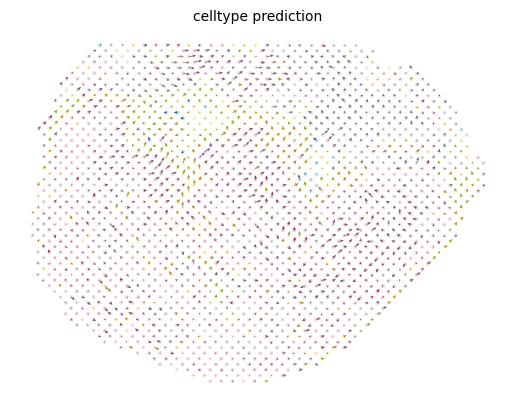

In [21]:
scv.pl.velocity_embedding(Visium_imputed,basis='xy_loc', color='celltype_prediction')

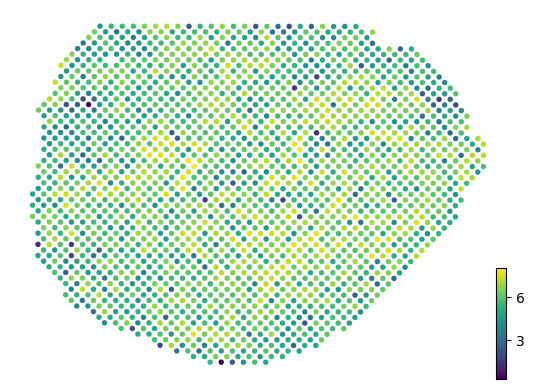

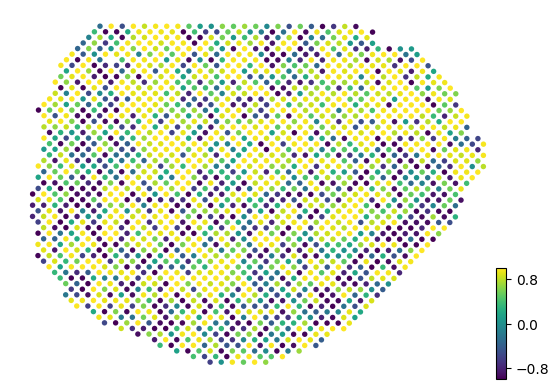

In [24]:
# Quantitative evaluation: Weighted similarity score  

Sim_velo = np.diag(cosine_similarity(Visium.layers['velocity'],Visium_imputed.layers['velocity']))
Sim_xy = np.diag(cosine_similarity(Visium.obsm['velocity_xy_loc'],Visium_imputed.obsm['velocity_xy_loc']))

Mag_velo = np.linalg.norm(Visium.layers['velocity'],axis=1)
Mag_xy = np.linalg.norm(Visium.obsm['velocity_xy_loc'],axis=1)

fig,ax=plt.subplots()
scv.pl.scatter(Visium,basis='xy_loc', color=np.log2(Mag_xy),ax=ax)
ax.invert_xaxis()

fig,ax=plt.subplots()
scv.pl.scatter(Visium,basis='xy_loc', color=Sim_xy,ax=ax)
ax.invert_xaxis()

In [25]:
Sim_velo = np.diag(cosine_similarity(Visium.layers['velocity'],Visium_imputed.layers['velocity'])) #
Sim_xy = np.diag(cosine_similarity(Visium.obsm['velocity_xy_loc'],Visium_imputed.obsm['velocity_xy_loc'])) 

Mag_velo = np.linalg.norm(Visium.layers['velocity'],axis=1)
Mag_xy = np.linalg.norm(Visium.obsm['velocity_xy_loc'],axis=1)  

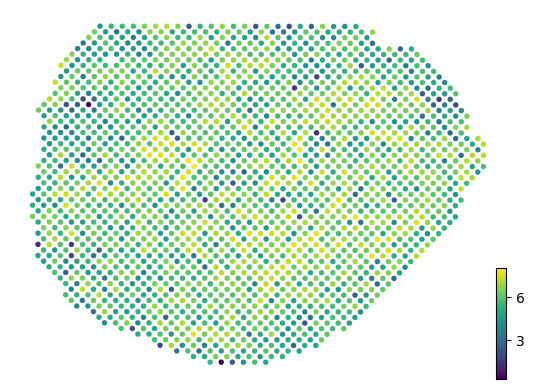

In [26]:
fig,ax=plt.subplots()
scv.pl.scatter(Visium,basis='xy_loc', color=np.log2(Mag_xy),ax=ax)
ax.invert_xaxis()

In [ ]:
fig,ax=plt.subplots()
scv.pl.scatter(Visium,basis='xy_loc', color=Sim_xy,ax=ax)
ax.invert_xaxis()

Mag_velo = Mag_velo/np.sum(Mag_velo)
Mag_xy = Mag_xy/np.sum(Mag_xy)

print("Weighted Similarity score for high-dimensional velocity = ", np.dot(Sim_velo,Mag_velo))
print("Weighted Similarity score for spatial velocity = ", np.dot(Sim_xy,Mag_xy))

In [ ]:
#Calculate omega
def objective(omega, T, D, Y):
    return np.sum((omega * T + (1 - omega) * D - Y) ** 2)

df = pd.read_csv('KSRV Datasets\Chicken_heart\Chicken Heart-Time-Distance.csv')

def standardize(series):
    return (series - series.mean()) / series.std()

results = []

for cell_type, group in data.groupby('Type'):
    T = standardize(group['latent_time'].values)
    D = standardize(group['Distance'].values)
    Y = standardize(group['Average Expression'].values)
    
    res = minimize(objective, x0=[0.5], args=(T, D, Y), bounds=[(0, 1)])
    omega_opt = res.x[0]
    
    results.append({'Type': cell_type, 'omega': omega_opt})

results_df = pd.DataFrame(results)

print(results_df)